In [25]:
from google.colab import files

# Carregando a planilha no Google Colab
simple_diabeates = files.upload()

# Lendo a planilha
simple_diabeates = pd.read_csv(next(iter(simple_diabeates)))

Saving simple_diabetes.csv to simple_diabetes.csv


In [26]:
from google.colab import files

# Carregando a planilha no Google Colab
pima_diabetes = files.upload()

# Lendo a planilha
pima_diabetes = pd.read_csv(next(iter(pima_diabetes)))

Saving pima_diabetes.csv to pima_diabetes.csv


In [48]:
# Importando as variaveis
import pandas as pd
import numpy as np

In [49]:
simple_diabeates.head()

plas  mass  class
0   85.0  26.6    0.0
1   89.0  28.1    0.0
2  116.0  25.6    0.0
3   97.0  23.2    0.0
4   88.0  24.8    0.0

In [50]:
pima_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [44]:
# Validação

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)

clf.fit(X, y)

clf.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [46]:
# Display the first few rows of both datasets to understand their structure
pima_diabetes_head = pima_diabetes.head()
simple_diabeates_head = simple_diabeates.head()

pima_diabetes_head, simple_diabeates_head


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
     plas  mass  class
 0   85.0  26.6    0.0
 1   89.0  28.1    0.0
 2  116.0  25.6    0.0
 3   97.0  23.2    0.0
 4   88.0  24.8    0.0)

Acurácia no conjunto de dados Simples Diabetes: 100.00%
Acurácia no conjunto de dados Pima Diabetes: 76.62%


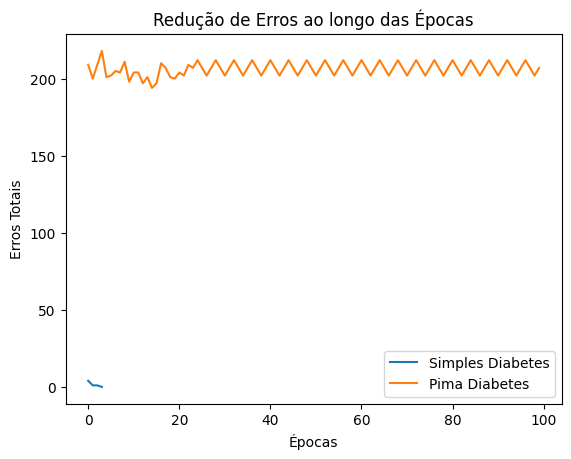

In [47]:
# Implementação da classe Perceptron e processo de treinamento/teste
# Implementação da classe Perceptron e processo de treinamento/teste

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    # Função de predição para calcular a saída com base na entrada e nos pesos
    def predict(self, X, w):
        return 1 if np.dot(X, w) >= 0 else 0

    # Treinamento do perceptron usando a regra delta
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)  # Inicializar pesos aleatoriamente
        errors = []

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(n_samples):
                # Prever a saída
                y_pred = self.predict(X[i], self.weights)
                error = y[i] - y_pred
                # Atualizar os pesos usando a regra delta
                self.weights += self.learning_rate * error * X[i]
                total_error += abs(error)
            errors.append(total_error)
            # Parar se não houver erros na época
            if total_error == 0:
                break

        return errors

    # Função para calcular a acurácia
    def accuracy(self, X, y):
        correct = 0
        for i in range(len(y)):
            if self.predict(X[i], self.weights) == y[i]:
                correct += 1
        return correct / len(y) * 100

# Preparar dados para treinamento e teste
# Dados 1: Simples Diabetes
X1 = simple_diabeates[['plas', 'mass']].values
y1 = simple_diabeates['class'].values

# Normalizar dados (opcional)
X1 = (X1 - X1.mean(axis=0)) / X1.std(axis=0)

# Adicionando termo de bias (coluna de 1s)
X1 = np.c_[np.ones(X1.shape[0]), X1]

# Dados 2: Pima Diabetes
X2 = pima_diabetes[['Glucose', 'BMI']].values
y2 = pima_diabetes['Outcome'].values

# Normalizar dados (opcional)
X2 = (X2 - X2.mean(axis=0)) / X2.std(axis=0)

# Adicionando termo de bias (coluna de 1s)
X2 = np.c_[np.ones(X2.shape[0]), X2]

# Dividindo os dados em treino e teste (divisão manual)
# Para simplicidade, vamos dividir os dados em 80% treino, 20% teste
split_ratio = 0.8

# Divisão para o Dados1
split_index_1 = int(split_ratio * len(y1))
X1_train, X1_test = X1[:split_index_1], X1[split_index_1:]
y1_train, y1_test = y1[:split_index_1], y1[split_index_1:]

# Divisão para o Dados2
split_index_2 = int(split_ratio * len(y2))
X2_train, X2_test = X2[:split_index_2], X2[split_index_2:]
y2_train, y2_test = y2[:split_index_2], y2[split_index_2:]

# Inicializar modelos Perceptron
perceptron1 = Perceptron(learning_rate=0.1, epochs=100)
perceptron2 = Perceptron(learning_rate=0.1, epochs=100)

# Treinar o Perceptron em ambos os conjuntos de dados
errors1 = perceptron1.fit(X1_train, y1_train)
errors2 = perceptron2.fit(X2_train, y2_train)

# Calcular acurácia nos conjuntos de teste
accuracy1 = perceptron1.accuracy(X1_test, y1_test)
accuracy2 = perceptron2.accuracy(X2_test, y2_test)

# Exibir resultados
print(f"Acurácia no conjunto de dados Simples Diabetes: {accuracy1:.2f}%")
print(f"Acurácia no conjunto de dados Pima Diabetes: {accuracy2:.2f}%")

# Plotar erros ao longo das épocas para ambos os conjuntos de dados
plt.plot(errors1, label='Simples Diabetes')
plt.plot(errors2, label='Pima Diabetes')
plt.title('Redução de Erros ao longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Erros Totais')
plt.legend()
plt.show()
